In [1]:
import ensemble
import importlib
importlib.reload(ensemble) #this is for notebooks - otherwise I have to restart the kernel every time I change anything

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import RadiusNeighborsRegressor, KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 5]

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_regression

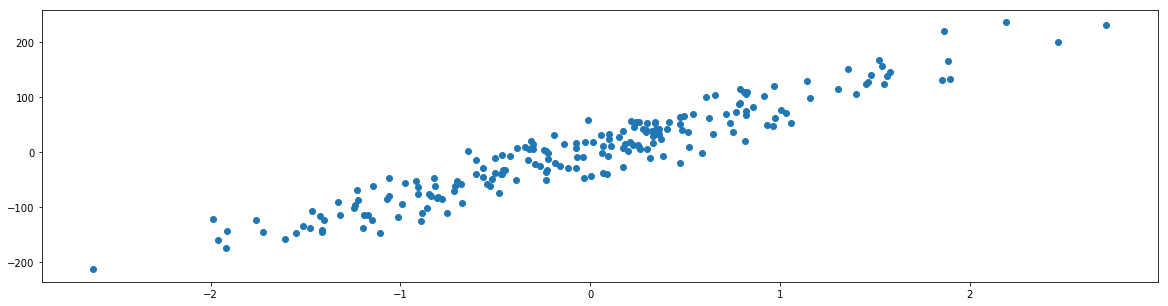

In [2]:
X, y = make_regression(n_samples=200, n_features=1, noise=25,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
plt.scatter(X,y)

/Users/thomas/anaconda/envs/tfdeeplearning/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


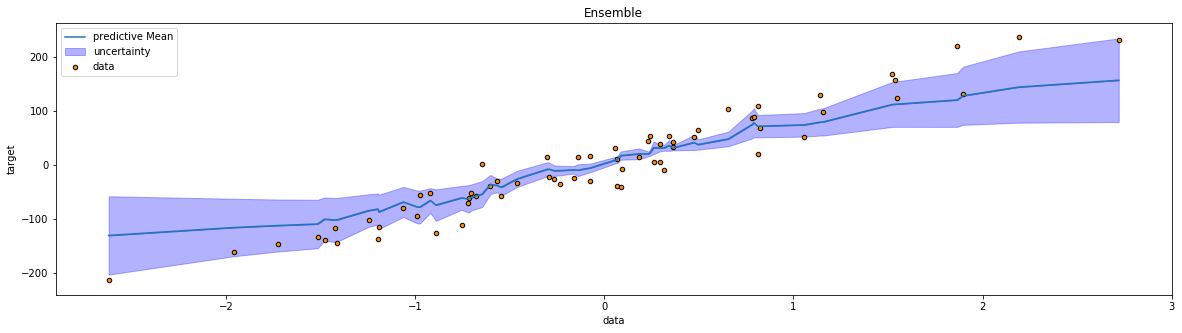

In [3]:

mixed_ensemble = ensemble.MixedRegressionEnsemble(models = [DecisionTreeRegressor(),
                                                            LinearRegression(),
                                                            KNeighborsRegressor(),
                                                            MLPRegressor(max_iter=2000),
                                                           SVR(),
                                                           #RandomForestRegressor()
                                                           ])
mixed_ensemble.fit(X_train,y_train)
y_hat,std  = mixed_ensemble.predict(X_test,std=True)
mixed_ensemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

In [4]:
mixed_ensemble.self_evaluate(X_test,y_test)

{'NLPD': -33.46391431060045,
 'correlation between error and variance': 0.570578703665562,
 'coverage probability': 0.4393939393939394,
 'rsme': 35.884422744471294}

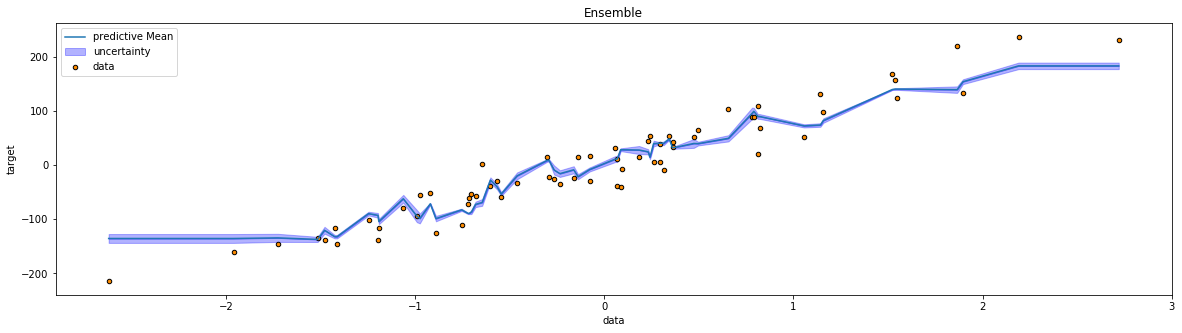

In [5]:
treeEnsemble = ensemble.RegressionEnsemble(10,RandomForestRegressor)
treeEnsemble.fit(X_train,y_train)
y_hat,std  = treeEnsemble.predict(X_test,std=True)
treeEnsemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

In [6]:
treeEnsemble.self_evaluate(X_test,y_test)

{'NLPD': -130.5712001759948,
 'correlation between error and variance': 0.11195043709809054,
 'coverage probability': 0.09090909090909091,
 'rsme': 32.427963504860784}

Bootstrap

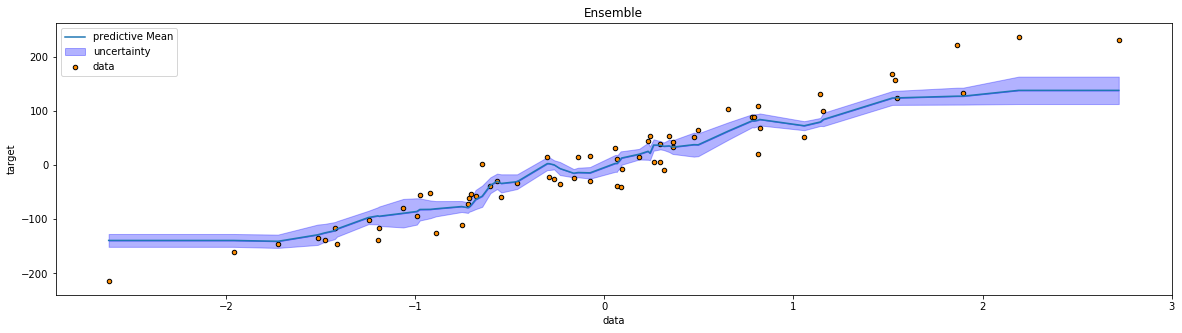

In [7]:
bootstrap_ensemble = ensemble.BootstrapEnsemble(model_type=RandomForestRegressor)


bootstrap_ensemble.fit(X_train,y_train)
y_hat,std  = bootstrap_ensemble.predict(X_test,std=True)
bootstrap_ensemble.mutli_dimenstional_scatterplot(X_test,y_test,figsize=(20,5))

In [8]:
bootstrap_ensemble.self_evaluate(X_test,y_test)

{'NLPD': -42.08455854712095,
 'correlation between error and variance': 0.3202236001310516,
 'coverage probability': 0.3333333333333333,
 'rsme': 34.04878775872008}